In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import expon
from scipy.stats import norm
from scipy import stats

from collections import Counter

from math import radians, cos, sin, asin, sqrt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [8]:
# df = pd.read_csv('最终干净的数据.csv')
path = 'C:\\Users\\ASUS\\Desktop\\IOM魔改2\\IOM209\\最终干净的数据改.csv'
try:
    # 将 low_memory 设置为 False
    df = pd.read_csv(path, low_memory=False)
    print("文件读取成功")
except FileNotFoundError:
    print("文件未找到，请检查文件路径。")
except Exception as e:
    print(f"发生其他错误: {e}")

文件读取成功


In [9]:
selected_features = [
    'tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
    'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 
    'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty', 
    'subway', 'district',
    # 'communityAverage',
    'distance', 'Age',
    'floorType', 'floorHeight', 'room_count', 'room_ratio','north_south','Investment in residential real estate development in Beijing'

]

In [10]:
X = df[selected_features]      # 特征列
y = df['price_log']            # 回归目标：对数价格

In [11]:
#数据集划分
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [30]:
#baseline，选择Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Baseline - Linear Regression")
print(f"RMSE (log space): {rmse:.4f}")
print(f"R² score: {r2:.4f}")

Baseline - Linear Regression
RMSE (log space): 0.2289
R² score: 0.7345


In [14]:
# 原始价格维度评估
#log函数的逆运算，把 log(price) 的预测值还原成原始 price 的预测值，
#这样就能在 原始房价单位（RMB/㎡）下评估模型效果了。
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"RMSE (original price): {rmse_original:.2f} RMB/㎡")
#TODO为什么打印了价格？

RMSE (original price): 10224.53 RMB/㎡


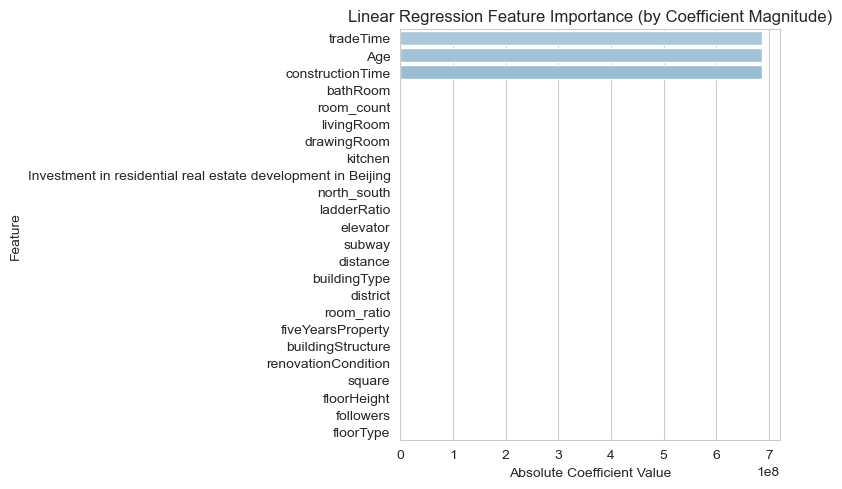

In [15]:
# 特征重要性可视化
# 构建 DataFrame
linear_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_,
    'importance': np.abs(model.coef_)  # 绝对值排序
}).sort_values(by='importance', ascending=False)

# 可视化
plt.figure(figsize=(8, 5))
sns.barplot(data=linear_importance, x='importance', y='feature', palette='Blues_d')
plt.title("Linear Regression Feature Importance (by Coefficient Magnitude)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

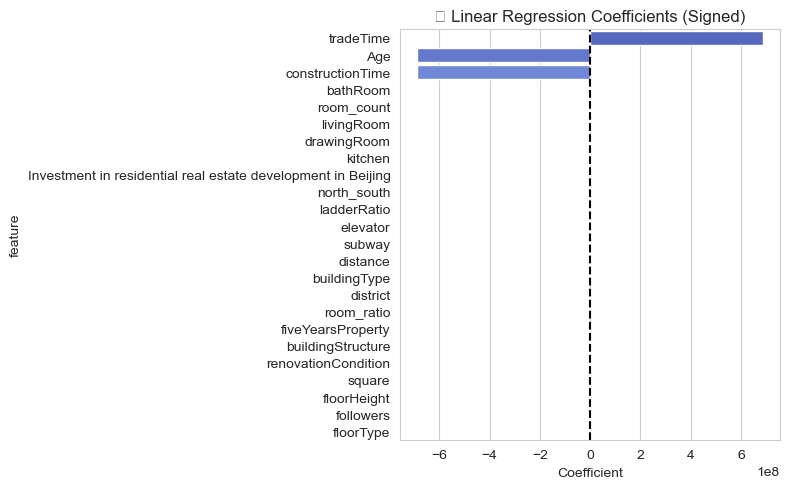

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(data=linear_importance, x='coefficient', y='feature', palette='coolwarm')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("📈 Linear Regression Coefficients (Signed)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()

In [17]:
# 以下是新增的交叉验证部分代码
from sklearn.model_selection import cross_val_score # 新增导入 cross_val_score 函数
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# cv=5 表示 5 折交叉验证，scoring='neg_mean_squared_error' 采用负均方误差作为评估指标
cv_rmse_scores = np.sqrt(-cv_scores)
# 因为 cross_val_score 返回的是负均方误差，取负后开方得到 RMSE
print(f"Cross-Validation RMSE scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {np.mean(cv_rmse_scores):.4f}")

cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² scores: {cv_scores_r2}")
print(f"Mean Cross-Validation R²: {np.mean(cv_scores_r2):.4f}")

Cross-Validation RMSE scores: [0.30067798 0.22658998 0.22026256 0.23490085 0.25038513]
Mean Cross-Validation RMSE: 0.2466
Cross-Validation R² scores: [0.29971489 0.82829546 0.29723092 0.61188109 0.67114097]
Mean Cross-Validation R²: 0.5417
